In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [125]:
crime_incident = pd.read_csv("https://raw.githubusercontent.com/jeremidaneau/Montreal-hot-spot-prediction/main/data/crime_by_grid_by_quarter.csv",encoding='latin-1')

#print(crime['CATEGORIE'].unique())

#crime['Date'] = pd.to_datetime(crime['Date'])

crime

,incident_nb,quarter,Key,Right_Key,Crime_nb,Right_quarter,CATEGORIE
0,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,1,2015 Q1,Introduction
1,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,1,2015 Q1,Méfait
2,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,2,2015 Q1,Vol dans / sur véhicule à moteur
3,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,2,2015 Q1,Vol de véhicule à moteur
4,7,2015 Q2,Caserne 03 Grid0_0,Caserne 03 Grid0_0,2,2015 Q2,Introduction
...,...,...,...,...,...,...,...
50646,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,Introduction
50647,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,Méfait
50648,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,Vol dans / sur véhicule à moteur
50649,3,2022 Q2,caserne 47 Grid2_2,caserne 47 Grid2_2,2,2022 Q2,Méfait


In [126]:
categorical_cols = ['CATEGORIE']
data = pd.get_dummies(crime_incident, columns = categorical_cols)
data.head()

,incident_nb,quarter,Key,Right_Key,Crime_nb,Right_quarter,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés
0,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,1,2015 Q1,0,1,0,0,0,0
1,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,1,2015 Q1,0,0,1,0,0,0
2,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,2,2015 Q1,0,0,0,1,0,0
3,18,2015 Q1,Caserne 03 Grid0_0,Caserne 03 Grid0_0,2,2015 Q1,0,0,0,0,1,0
4,7,2015 Q2,Caserne 03 Grid0_0,Caserne 03 Grid0_0,2,2015 Q2,0,1,0,0,0,0


In [127]:
data_hous = pd.read_csv("https://raw.githubusercontent.com/donaldkinyafisher/predictionIncindieMontreal/main/datasets/incidences_with_housing_data.csv",  encoding='latin-1')

data_hous

,Grid,Caserne,Count,Avg_ETAGE_HORS,Avg_ANNEE_CONS,Mode_CATEGORIE_LIBELLE_UT
0,caserne 47 Grid2_0,caserne 47,3,1.666667,1969.333333,Logement-Régulier
1,Caserne 50 Grid1_1,Caserne 50,1,2.000000,1957.000000,Logement-Régulier
2,Caserne 37 Grid3_3,Caserne 37,6,2.123288,1934.986301,Logement-Régulier
3,caserne 47 Grid0_3,caserne 47,7,2.108108,1934.729730,Logement-Régulier
4,Caserne 09 Grid4_4,Caserne 09,11,1.750000,1957.285714,Logement-Régulier
...,...,...,...,...,...,...
705,Caserne 46 Grid3_0,Caserne 46,2,1.812500,1950.812500,Logement-Régulier
706,Caserne 09 Grid7_7,Caserne 09,2,1.833333,1950.833333,Logement-Régulier
707,Caserne 29 Grid0_3,Caserne 29,6,1.464286,1987.928571,Logement-Condominium
708,Caserne 46 Grid1_3,Caserne 46,7,1.696970,1953.484848,Logement-Régulier


In [128]:
the_data = data.merge(data_hous, left_on='Key', right_on='Grid' )

the_data

,incident_nb,quarter,Key,Right_Key,Crime_nb,Right_quarter,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés,Grid,Caserne,Count,Avg_ETAGE_HORS,Avg_ANNEE_CONS,Mode_CATEGORIE_LIBELLE_UT
0,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,11,2015 Q1,0,1,0,0,0,0,Caserne 03 Grid0_1,Caserne 03,7,4.000000,1985.000000,Logement-Condominium
1,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,2,2015 Q1,0,0,1,0,0,0,Caserne 03 Grid0_1,Caserne 03,7,4.000000,1985.000000,Logement-Condominium
2,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,3,2015 Q1,0,0,0,1,0,0,Caserne 03 Grid0_1,Caserne 03,7,4.000000,1985.000000,Logement-Condominium
3,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,1,2015 Q1,0,0,0,0,0,1,Caserne 03 Grid0_1,Caserne 03,7,4.000000,1985.000000,Logement-Condominium
4,10,2015 Q2,Caserne 03 Grid0_1,Caserne 03 Grid0_1,6,2015 Q2,0,1,0,0,0,0,Caserne 03 Grid0_1,Caserne 03,7,4.000000,1985.000000,Logement-Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,0,1,0,0,0,0,caserne 47 Grid2_2,caserne 47,6,1.981132,1935.207547,Logement-Régulier
13150,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,0,0,1,0,0,0,caserne 47 Grid2_2,caserne 47,6,1.981132,1935.207547,Logement-Régulier
13151,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,0,0,0,1,0,0,caserne 47 Grid2_2,caserne 47,6,1.981132,1935.207547,Logement-Régulier
13152,3,2022 Q2,caserne 47 Grid2_2,caserne 47 Grid2_2,2,2022 Q2,0,0,1,0,0,0,caserne 47 Grid2_2,caserne 47,6,1.981132,1935.207547,Logement-Régulier


In [129]:
categorical_cols = ['Mode_CATEGORIE_LIBELLE_UT']
the_data_ = pd.get_dummies(the_data, columns = categorical_cols)
the_data_
print(len(the_data['incident_nb']))

13154


In [130]:
census_humain = pd.read_csv("https://raw.githubusercontent.com/donaldkinyafisher/predictionIncindieMontreal/main/datasets/incidences_with_census_data.csv")

census_humain = census_humain.drop(['AreaSqKm','NOM_CAS_AD','NO_CAS_ADM', 'OBJECTID','CentroidX','CentroidY','GridName','Input_#2_Key','Count'],axis=1)
ch = census_humain.dropna()
print(len(census_humain))
ch.isna().sum()

1012


Key                    0
Fire Count per Year    0
Fire Count 6 years     0
Avg_Pop__Densi         0
Avg_Income___T         0
Avg_Income___2         0
Avg_Income___3         0
Avg_Housing___         0
Avg_Education_         0
dtype: int64

In [131]:
ch

,Key,Fire Count per Year,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,Caserne 03 Grid0_0,2.0,10.0,11430.107143,898.214286,100.0,71.550000,561.785714,890.714286
1,Caserne 03 Grid0_1,2.0,14.0,11581.670000,675.000000,100.0,67.620000,399.000000,676.500000
2,Caserne 03 Grid1_0,6.0,35.0,5239.475000,1881.666667,100.0,87.500000,1285.000000,1873.333333
7,Caserne 04 Grid1_0,3.0,16.0,4532.416667,1032.500000,100.0,72.483333,559.166667,1010.000000
8,Caserne 04 Grid1_1,1.0,6.0,3088.816667,832.500000,100.0,65.383333,452.500000,801.666667
...,...,...,...,...,...,...,...,...,...
1006,caserne 47 Grid1_1,8.0,46.0,11642.362857,447.714286,100.0,75.437143,284.714286,450.000000
1007,caserne 47 Grid1_2,7.0,40.0,12379.345161,496.129032,100.0,79.845161,322.903226,497.419355
1008,caserne 47 Grid1_3,0.0,1.0,11015.133333,790.000000,100.0,82.183333,530.833333,795.000000
1009,caserne 47 Grid2_0,1.0,5.0,6331.660000,556.000000,100.0,66.600000,369.000000,537.000000


In [132]:
all_data = the_data_.merge(ch, left_on='Key', right_on='Key' )
all_data

,incident_nb,quarter,Key,Right_Key,Crime_nb,Right_quarter,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,...,Mode_CATEGORIE_LIBELLE_UT_Logement-Régulier,"Mode_CATEGORIE_LIBELLE_UT_Service de garderie (prématernelle, moins de 50 % de poupons)-Régulier",Fire Count per Year,Fire Count 6 years,Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,11,2015 Q1,0,1,0,0,...,0,0,2.0,14.0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
1,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,2,2015 Q1,0,0,1,0,...,0,0,2.0,14.0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
2,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,3,2015 Q1,0,0,0,1,...,0,0,2.0,14.0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
3,12,2015 Q1,Caserne 03 Grid0_1,Caserne 03 Grid0_1,1,2015 Q1,0,0,0,0,...,0,0,2.0,14.0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
4,10,2015 Q2,Caserne 03 Grid0_1,Caserne 03 Grid0_1,6,2015 Q2,0,1,0,0,...,0,0,2.0,14.0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12870,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,0,1,0,0,...,1,0,1.0,7.0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12871,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,0,0,1,0,...,1,0,1.0,7.0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12872,2,2021 Q4,caserne 47 Grid2_2,caserne 47 Grid2_2,1,2021 Q4,0,0,0,1,...,1,0,1.0,7.0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12873,3,2022 Q2,caserne 47 Grid2_2,caserne 47 Grid2_2,2,2022 Q2,0,0,1,0,...,1,0,1.0,7.0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857


In [133]:
all_data = all_data.drop(['Key','Right_Key','Right_quarter','Fire Count per Year','Fire Count 6 years'], axis=1)
all_data

,incident_nb,quarter,Crime_nb,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés,Grid,...,Mode_CATEGORIE_LIBELLE_UT_Immeuble commercial-Régulier,Mode_CATEGORIE_LIBELLE_UT_Logement-Condominium,Mode_CATEGORIE_LIBELLE_UT_Logement-Régulier,"Mode_CATEGORIE_LIBELLE_UT_Service de garderie (prématernelle, moins de 50 % de poupons)-Régulier",Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,12,2015 Q1,11,0,1,0,0,0,0,Caserne 03 Grid0_1,...,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
1,12,2015 Q1,2,0,0,1,0,0,0,Caserne 03 Grid0_1,...,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
2,12,2015 Q1,3,0,0,0,1,0,0,Caserne 03 Grid0_1,...,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
3,12,2015 Q1,1,0,0,0,0,0,1,Caserne 03 Grid0_1,...,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
4,10,2015 Q2,6,0,1,0,0,0,0,Caserne 03 Grid0_1,...,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12870,2,2021 Q4,1,0,1,0,0,0,0,caserne 47 Grid2_2,...,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12871,2,2021 Q4,1,0,0,1,0,0,0,caserne 47 Grid2_2,...,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12872,2,2021 Q4,1,0,0,0,1,0,0,caserne 47 Grid2_2,...,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12873,3,2022 Q2,2,0,0,1,0,0,0,caserne 47 Grid2_2,...,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857


In [169]:
#Split into features and target

X = all_data.drop(['incident_nb','quarter','Grid','Caserne','Count'], axis =1)
y = all_data['incident_nb']

X

,Crime_nb,CATEGORIE_Infractions entrainant la mort,CATEGORIE_Introduction,CATEGORIE_Méfait,CATEGORIE_Vol dans / sur véhicule à moteur,CATEGORIE_Vol de véhicule à moteur,CATEGORIE_Vols qualifiés,Avg_ETAGE_HORS,Avg_ANNEE_CONS,Mode_CATEGORIE_LIBELLE_UT_Autres activités d'impression commerciale-Régulier,Mode_CATEGORIE_LIBELLE_UT_Immeuble commercial-Régulier,Mode_CATEGORIE_LIBELLE_UT_Logement-Condominium,Mode_CATEGORIE_LIBELLE_UT_Logement-Régulier,"Mode_CATEGORIE_LIBELLE_UT_Service de garderie (prématernelle, moins de 50 % de poupons)-Régulier",Avg_Pop__Densi,Avg_Income___T,Avg_Income___2,Avg_Income___3,Avg_Housing___,Avg_Education_
0,11,0,1,0,0,0,0,4.000000,1985.000000,0,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
1,2,0,0,1,0,0,0,4.000000,1985.000000,0,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
2,3,0,0,0,1,0,0,4.000000,1985.000000,0,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
3,1,0,0,0,0,0,1,4.000000,1985.000000,0,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
4,6,0,1,0,0,0,0,4.000000,1985.000000,0,0,1,0,0,11581.670000,675.000000,100.0,67.62,399.000000,676.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12870,1,0,1,0,0,0,0,1.981132,1935.207547,0,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12871,1,0,0,1,0,0,0,1.981132,1935.207547,0,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12872,1,0,0,0,1,0,0,1.981132,1935.207547,0,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857
12873,2,0,0,1,0,0,0,1.981132,1935.207547,0,0,0,1,0,9969.785714,520.714286,100.0,82.70,343.571429,527.142857


In [135]:
print(X.shape)
print(y.shape)

(12875, 21)
(12875,)


In [170]:
#Create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

R^2 Training Score: 0.36 
R^2 Validation Score: 0.36


,features,feature_importance
10,Mode_CATEGORIE_LIBELLE_UT_Immeuble commercial-...,2.070025e+01
1,CATEGORIE_Infractions entrainant la mort,6.138056e+00
6,CATEGORIE_Vols qualifiés,1.831645e+00
0,Crime_nb,8.438688e-01
15,Avg_Income___T,4.315965e-02
14,Avg_Pop__Densi,5.633198e-04
16,Avg_Income___2,-3.552714e-15
18,Avg_Housing___,-5.611650e-03
19,Avg_Education_,-3.729244e-02
17,Avg_Income___3,-4.423742e-02


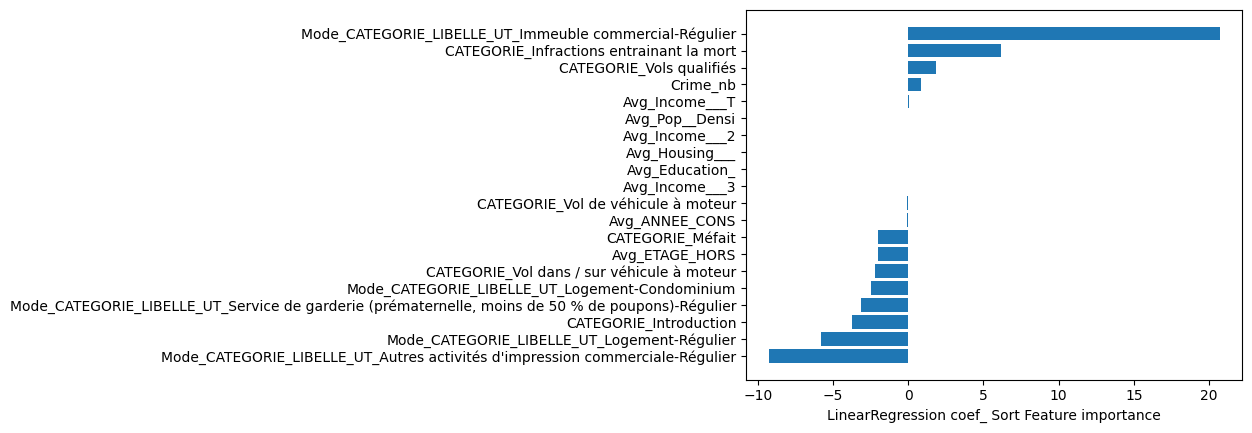

In [181]:
# linear regression feature importance

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot




#etrieve the coeff_ property that contains the coefficients found for each input variable.
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(model.score(X_train, y_train), model.score(X_test, y_test)))







 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.coef_})
feature_importances.sort_values('feature_importance',ascending=False)

sorted_idx = model.coef_.argsort()
plt.barh(feature_importances.features[sorted_idx], model.coef_[sorted_idx])
plt.xlabel("LinearRegression coef_ Sort Feature importance")

feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.coef_})
feature_importances.sort_values('feature_importance',ascending=False)

In [189]:
# RandomForestRegressor feature importance
 
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import CountVectorizer

model=RandomForestRegressor( bootstrap = True,random_state = 42,oob_score = True,)
 
model.fit(X_train,y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(model.score(X_train, y_train), 
                                                                                             model.oob_score_,
                                                                                             model.score(X_test, y_test)))

 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

R^2 Training Score: 0.88 
OOB Score: 0.73 
R^2 Validation Score: 0.74


,features,feature_importance
7,Avg_ETAGE_HORS,0.257638
8,Avg_ANNEE_CONS,0.210300
14,Avg_Pop__Densi,0.209301
0,Crime_nb,0.076251
17,Avg_Income___3,0.067759
18,Avg_Housing___,0.035198
19,Avg_Education_,0.032470
10,Mode_CATEGORIE_LIBELLE_UT_Immeuble commercial-...,0.030025
15,Avg_Income___T,0.021284
11,Mode_CATEGORIE_LIBELLE_UT_Logement-Condominium,0.012589


Text(0.5, 0, 'Random Forest Feature Importance Sort')

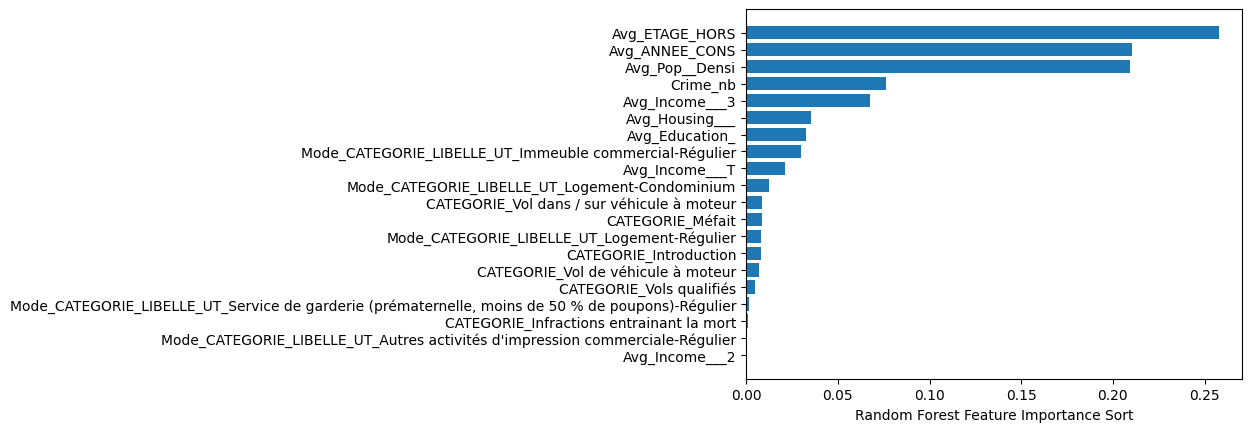

In [183]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(feature_importances.features[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance Sort")

In [194]:
#XGBRegressor features importances

model_X=XGBRegressor(n_estimators=1000, max_depth=7)
 
model_X.fit(X_train,y_train)


print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(model_X.score(X_train, y_train), model_X.score(X_test, y_test)))
 
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':model_X.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

[20:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Training Score: 0.88  
R^2 Validation Score: 0.71


,features,feature_importance
14,Avg_Pop__Densi,0.215866
7,Avg_ETAGE_HORS,0.162554
11,Mode_CATEGORIE_LIBELLE_UT_Logement-Condominium,0.156049
8,Avg_ANNEE_CONS,0.154570
17,Avg_Income___3,0.066862
19,Avg_Education_,0.052335
18,Avg_Housing___,0.052303
15,Avg_Income___T,0.051705
12,Mode_CATEGORIE_LIBELLE_UT_Logement-Régulier,0.035206
0,Crime_nb,0.009710


Text(0.5, 0, 'XGBRegressor Feature Importance Sort')

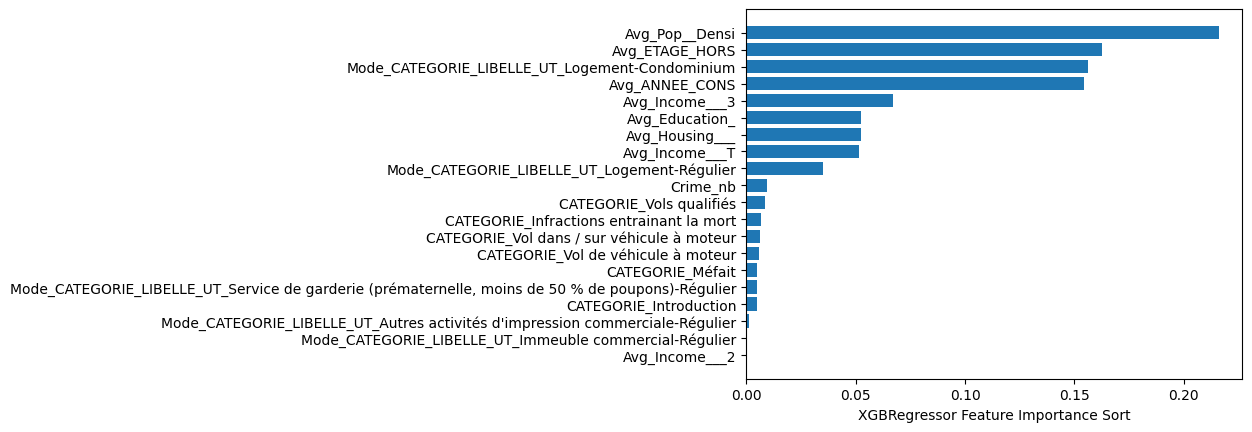

In [193]:
sorted_idx = model_X.feature_importances_.argsort()
plt.barh(feature_importances.features[sorted_idx], model_X.feature_importances_[sorted_idx])
plt.xlabel("XGBRegressor Feature Importance Sort")